# AQI Forecasting

This forecasting is done via RNN-LSTM model and it shows the forecast for next 30 days in Pune City

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
from ann import lstm

In [43]:
datatset = pd.read_csv("PNQ_AQI.csv")
datatset.head()

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2009-01-01 00:00:00,15,53,179.0,NaN,NaN,153.0,MPCB-KR
1,2009-02-01 00:00:00,15,48,156.0,NaN,NaN,137.0,MPCB-KR
2,2009-03-01 00:00:00,13,51,164.0,NaN,NaN,143.0,MPCB-KR
3,2009-04-01 00:00:00,8,37,135.0,NaN,NaN,123.0,MPCB-KR
4,2009-07-01 00:00:00,13,36,140.0,NaN,NaN,127.0,MPCB-KR


Preprocessing

In [44]:
datatset["AQI"].isnull().sum()

57

In [45]:
datatset['AQI'].fillna(value=datatset['AQI'].mean(), inplace=True)

In [46]:
datatset["AQI"].isnull().sum()

0

In [47]:
datatset.head()

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2009-01-01 00:00:00,15,53,179.0,NaN,NaN,153.0,MPCB-KR
1,2009-02-01 00:00:00,15,48,156.0,NaN,NaN,137.0,MPCB-KR
2,2009-03-01 00:00:00,13,51,164.0,NaN,NaN,143.0,MPCB-KR
3,2009-04-01 00:00:00,8,37,135.0,NaN,NaN,123.0,MPCB-KR
4,2009-07-01 00:00:00,13,36,140.0,NaN,NaN,127.0,MPCB-KR


In [48]:
data = datatset.iloc[:,6:7].values

In [49]:
data

array([[153.],
       [137.],
       [143.],
       ...,
       [173.],
       [108.],
       [147.]])

In [50]:
data[:10]

array([[153.],
       [137.],
       [143.],
       [123.],
       [127.],
       [123.],
       [131.],
       [124.],
       [110.],
       [143.]])

In [51]:
len(data)

7844

In [52]:
training_set = data[:7844-60]

In [53]:
testing_set = data[7844-60:]

In [54]:
len(testing_set)

60

In [55]:
len(training_set)

7784

In [56]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [57]:
X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [58]:
X_train =  np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [59]:
model = lstm(X_train, y_train)

Architecture of the Multi Stack LSTM Layer is ready!


In [60]:
model.train_it()

Epoch 1/5
242/242 [==============================] - 17s 56ms/step - loss: 0.0026
Epoch 2/5
242/242 [==============================] - 16s 66ms/step - loss: 0.0020
Epoch 3/5
242/242 [==============================] - 14s 60ms/step - loss: 0.0018
Epoch 4/5
242/242 [==============================] - 16s 67ms/step - loss: 0.0017
Epoch 5/5
242/242 [==============================] - 15s 63ms/step - loss: 0.0016


In [61]:
dataset_test = pd.read_csv("test_pune.csv")
testing_set = dataset_test.iloc[:, 6:7].values

In [62]:
testing_set

array([[ 91],
       [ 80],
       [ 53],
       [ 83],
       [ 70],
       [120],
       [ 89],
       [132],
       [122],
       [166],
       [130],
       [110],
       [117],
       [175],
       [144],
       [128],
       [126],
       [122],
       [130],
       [151],
       [168],
       [187],
       [153],
       [142],
       [153],
       [123],
       [152],
       [173],
       [108],
       [147]], dtype=int64)

In [63]:
dataset_total = pd.concat((datatset['AQI'], dataset_test['AQI']), axis = 0)

In [64]:
dataset_total

0     153.0
1     137.0
2     143.0
3     123.0
4     127.0
      ...  
25    123.0
26    152.0
27    173.0
28    108.0
29    147.0
Name: AQI, Length: 7874, dtype: float64

In [65]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60 : ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

C:\Users\ravin\AppData\Local\Temp\ipykernel_8996\2846909557.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total)-len(dataset_test)-60 : ].values


In [66]:
inputs

array([[0.18373072],
       [0.20336606],
       [0.18934081],
       [0.18793829],
       [0.16269285],
       [0.20336606],
       [0.16970547],
       [0.14586255],
       [0.14726508],
       [0.09957924],
       [0.11781206],
       [0.11220196],
       [0.1598878 ],
       [0.13744741],
       [0.1486676 ],
       [0.12482468],
       [0.08274895],
       [0.07713885],
       [0.10378682],
       [0.12762973],
       [0.0687237 ],
       [0.11220196],
       [0.15147265],
       [0.0687237 ],
       [0.11781206],
       [0.07854137],
       [0.09957924],
       [0.07713885],
       [0.07854137],
       [0.12622721],
       [0.12762973],
       [0.11220196],
       [0.0743338 ],
       [0.11640954],
       [0.09817672],
       [0.16830295],
       [0.12482468],
       [0.18513324],
       [0.17110799],
       [0.23281907],
       [0.18232819],
       [0.1542777 ],
       [0.16409537],
       [0.2454418 ],
       [0.20196353],
       [0.17952314],
       [0.17671809],
       [0.171

In [67]:
X_test = []

for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [68]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [69]:
X_test

array([[[0.18373072],
        [0.20336606],
        [0.18934081],
        ...,
        [0.24263675],
        [0.15147265],
        [0.20617111]],

       [[0.20336606],
        [0.18934081],
        [0.18793829],
        ...,
        [0.15147265],
        [0.20617111],
        [0.12762973]],

       [[0.18934081],
        [0.18793829],
        [0.16269285],
        ...,
        [0.20617111],
        [0.12762973],
        [0.11220196]],

       ...,

       [[0.07713885],
        [0.07854137],
        [0.12622721],
        ...,
        [0.21458626],
        [0.17251052],
        [0.21318373]],

       [[0.07854137],
        [0.12622721],
        [0.12762973],
        ...,
        [0.17251052],
        [0.21318373],
        [0.24263675]],

       [[0.12622721],
        [0.12762973],
        [0.11220196],
        ...,
        [0.21318373],
        [0.24263675],
        [0.15147265]]])

In [70]:
y_predicted = model.predict_it(X_test)

1/1 [==============================] - 1s 1s/step


In [71]:
len(y_predicted)

30

In [72]:
predicted_actual = sc.inverse_transform(y_predicted)

In [73]:
predicted_actual

array([[143.25667 ],
       [136.79018 ],
       [126.1556  ],
       [112.056404],
       [101.13794 ],
       [ 93.96923 ],
       [ 95.08132 ],
       [ 98.68847 ],
       [105.649414],
       [112.66414 ],
       [122.35995 ],
       [128.59967 ],
       [127.77393 ],
       [123.29291 ],
       [125.234924],
       [129.80836 ],
       [132.06825 ],
       [131.50403 ],
       [129.30304 ],
       [127.97361 ],
       [130.50902 ],
       [137.58774 ],
       [148.32727 ],
       [154.9424  ],
       [155.0086  ],
       [152.53279 ],
       [146.87964 ],
       [143.51752 ],
       [145.88751 ],
       [144.36043 ]], dtype=float32)

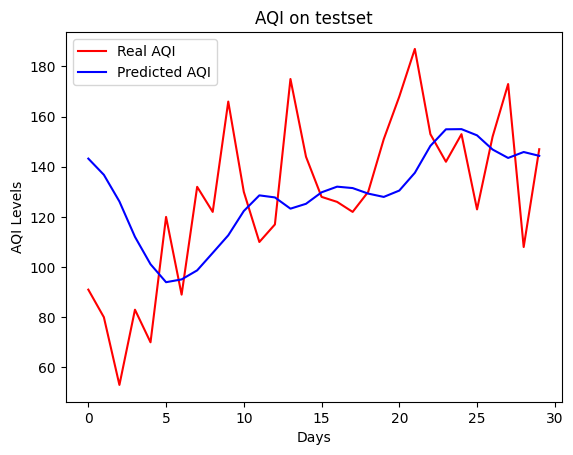

In [74]:
plt.plot(testing_set, color = 'red', label = "Real AQI")
plt.plot(predicted_actual, color = 'Blue', label = "Predicted AQI")
plt.title("AQI on testset")
plt.xlabel("Days")
plt.ylabel("AQI Levels")
plt.legend()
plt.show()